In [1]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('BankChurners.csv')



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Display the first few rows of the dataset
df.head()

# Check the dimensions of the dataset (number of rows, number of columns)
df.shape

# Get a summary of the dataset, including the data types and missing values
df.info()

# Calculate basic descriptive statistics of the numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [3]:
# Check for missing values in each column
df.isnull().sum()

# Handle missing values by either dropping rows/columns or imputing values
# For example, to drop rows with missing values
df.dropna(inplace=True)


In [4]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)


In [5]:
# Perform clustering using K-means algorithm
from sklearn.cluster import KMeans

X = df_encoded.drop(['Attrition_Flag'], axis=1)  # Use relevant columns for clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Segment'] = kmeans.fit_predict(X)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
#Clustering Analysis
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                  'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                  'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled = df_encoded.copy()  # Create a copy of the encoded DataFrame
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [7]:
#Analyzing Clusters
cluster_analysis = df_scaled.groupby('Segment')[numerical_cols].mean()
print(cluster_analysis)


         Customer_Age  Dependent_count  Months_on_book  \
Segment                                                  
0           -0.003216        -0.004578       -0.066229   
1            0.010433         0.007302       -0.174377   
2            0.014823         0.010749        0.632345   
3           -0.010293         0.012199        0.131369   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Segment                                                     
0                       -0.002899               -0.002492   
1                        0.011025               -0.056546   
2                        0.024307                0.087219   
3                       -0.025603                0.023133   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Segment                                                             
0                    -0.006817      0.000359            -0.000124   
1                    -0.016962      0.008470            -0.017316   
2       

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


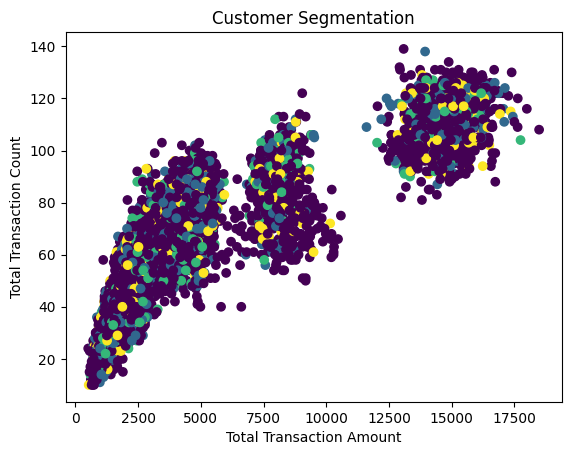

In [8]:
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Segment'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(df_encoded['Total_Trans_Amt'], df_encoded['Total_Trans_Ct'], c=df_encoded['Segment'])
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.title('Customer Segmentation')
plt.savefig('customer_segmentation.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

y = df_encoded['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8385982230997039
Confusion Matrix:
[[   0  327]
 [   0 1699]]


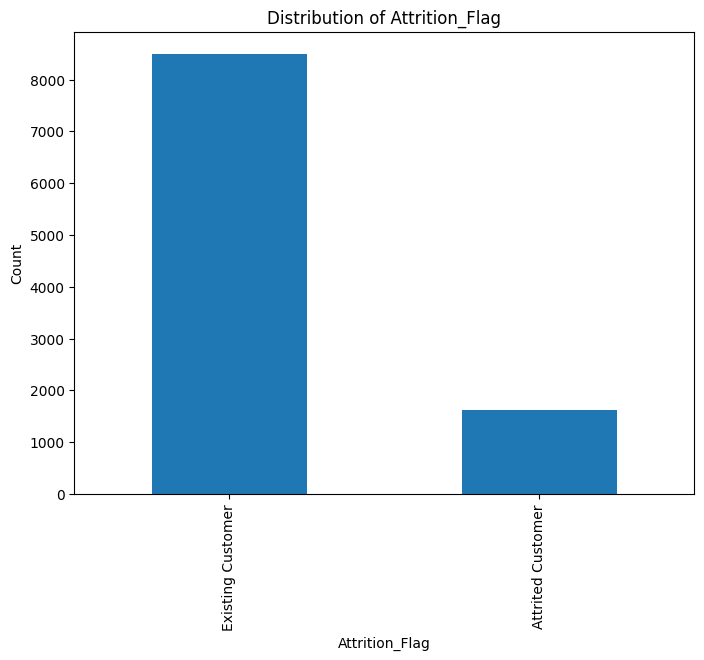

In [10]:
#Analyze the distribution of the target variable "Attrition_Flag" using a bar plot
plt.figure(figsize=(8, 6))
df['Attrition_Flag'].value_counts().plot(kind='bar')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')
plt.title('Distribution of Attrition_Flag')
plt.savefig('attrition_distribution.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


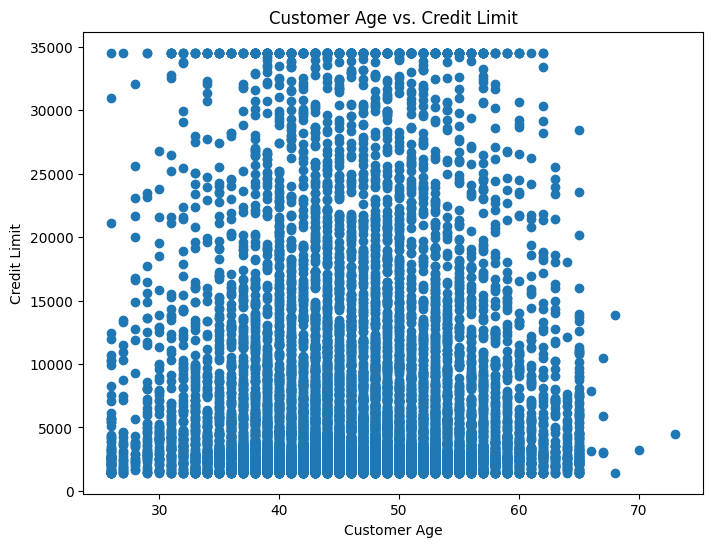

In [11]:
#Exploring the relationship between the customer's age and their credit limit using a scatter plot:
plt.figure(figsize=(8, 6))
plt.scatter(df['Customer_Age'], df['Credit_Limit'])
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.title('Customer Age vs. Credit Limit')
plt.savefig('age_credit_limit_scatter.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


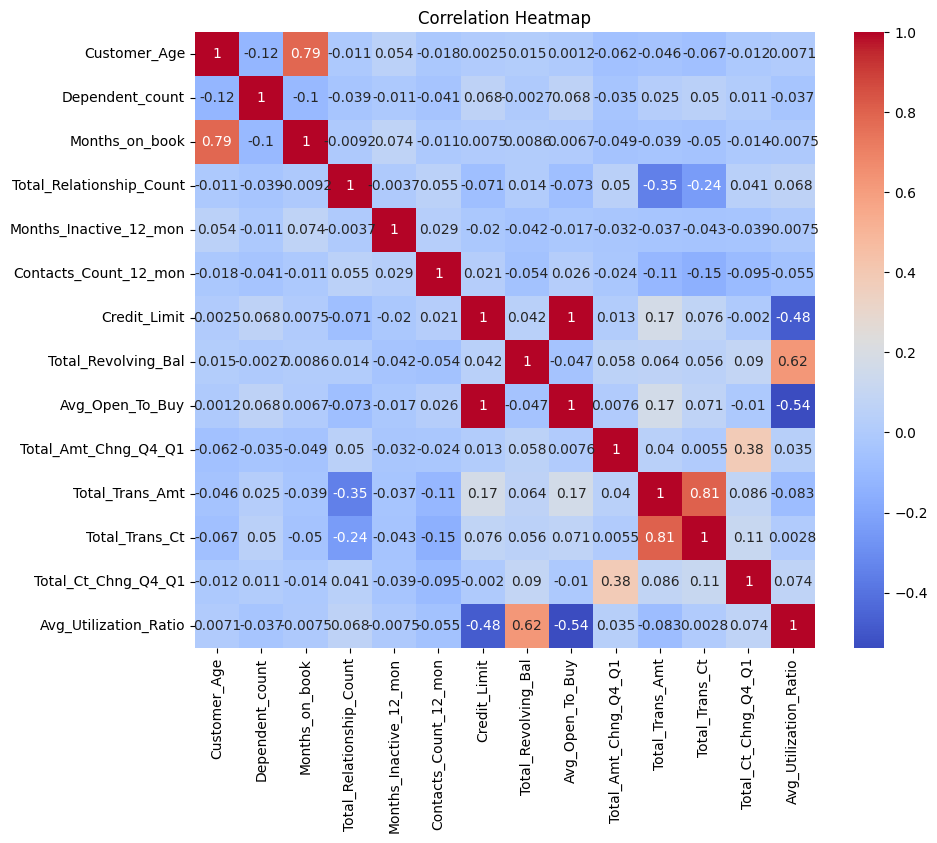

In [12]:
import seaborn as sns

# Select only the numerical columns for correlation calculation
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                  'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                  'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                  'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Create a new DataFrame with only the numerical columns
df_numeric = df[numerical_cols]

plt.figure(figsize=(10, 8))
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


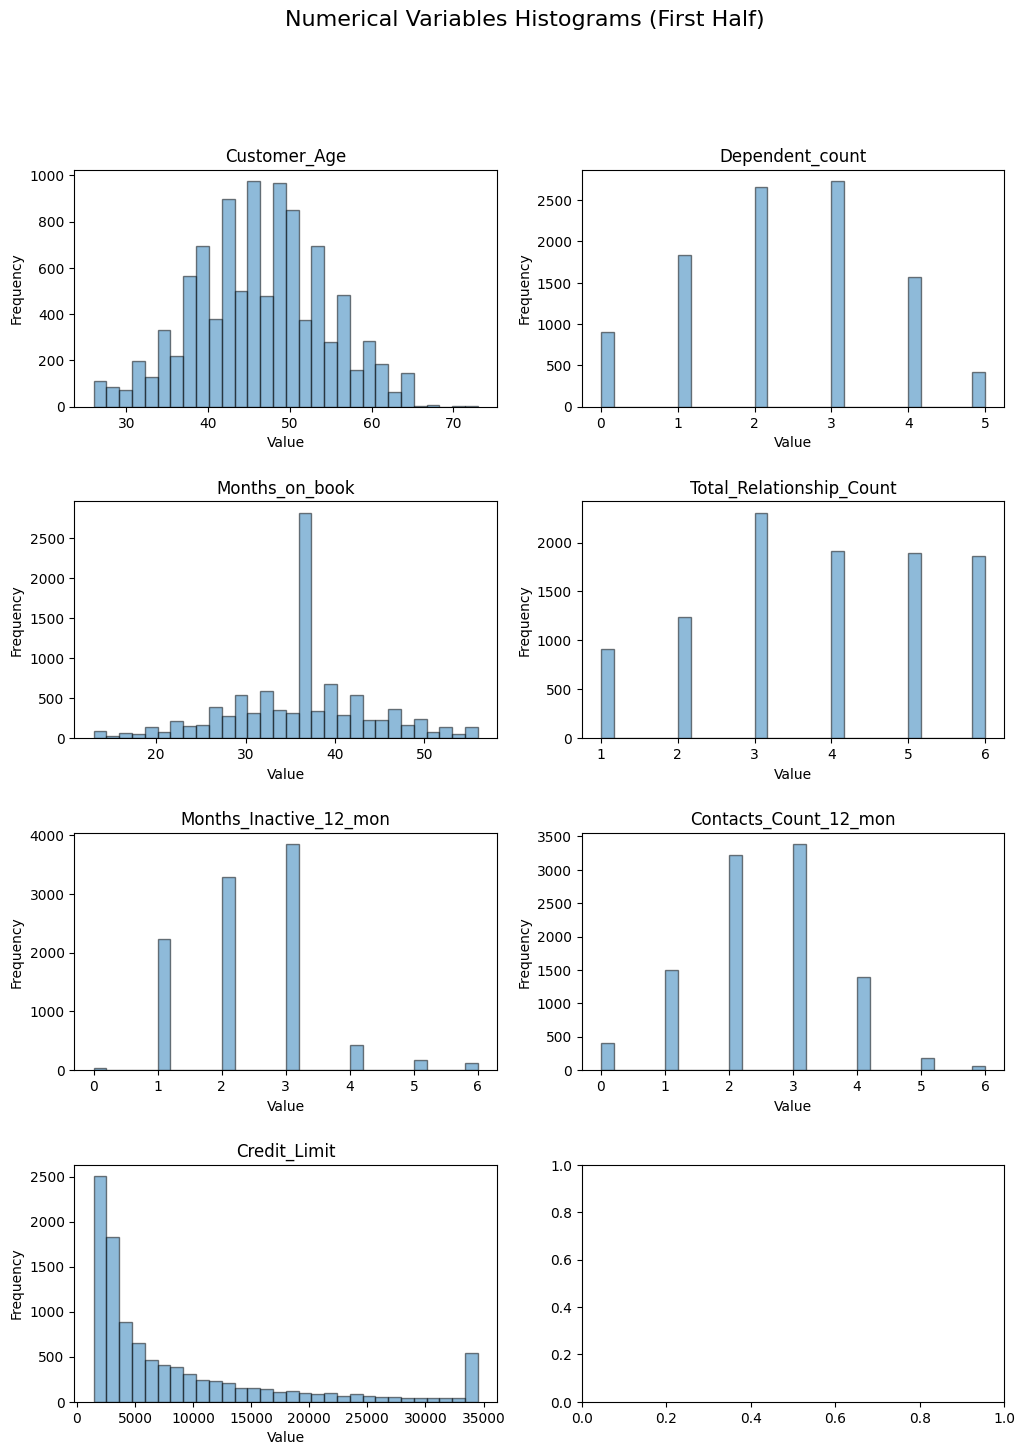

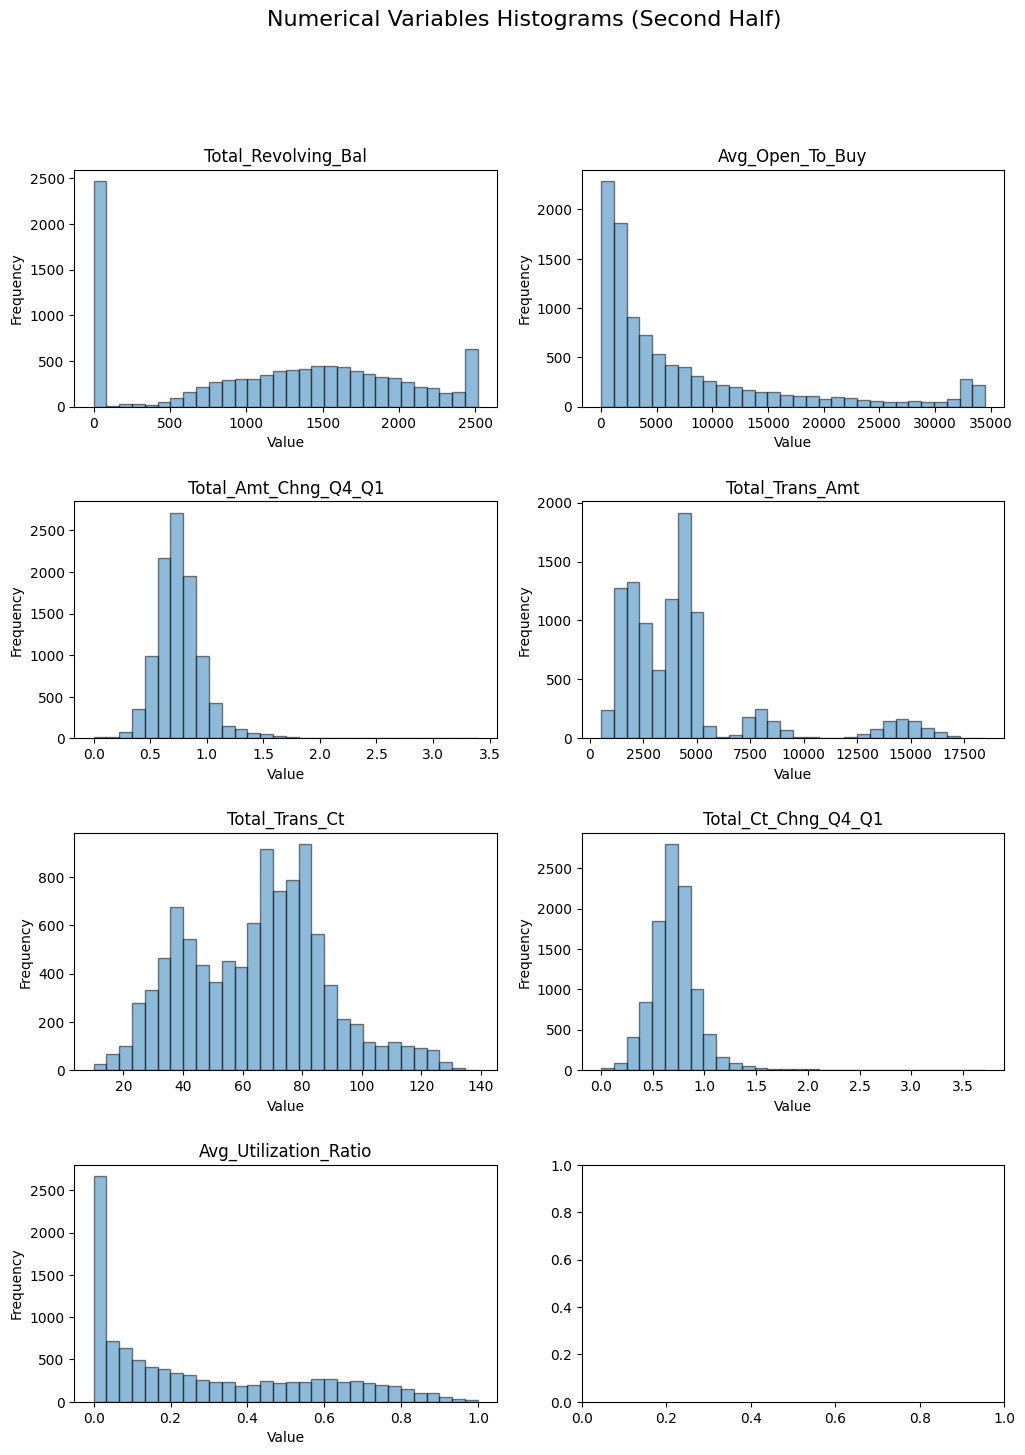

In [13]:
import matplotlib.pyplot as plt

# Define the first and second halves of the columns
first_half_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                   'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit']

second_half_cols = ['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Create subplots for the first half of the columns
fig1, axes1 = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig1.subplots_adjust(hspace=0.4)
fig1.suptitle('Numerical Variables Histograms (First Half)', fontsize=16)

# Generate histograms for the first half of the columns
for i, col in enumerate(first_half_cols):
    row = i // 2
    col = i % 2
    ax = axes1[row, col]
    ax.hist(df[first_half_cols[i]], bins=30, edgecolor='black', alpha=0.5)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(first_half_cols[i])

# Save the first half histograms as a PNG file
fig1.savefig('first_half_histograms.png', format='png')

# Create subplots for the second half of the columns
fig2, axes2 = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig2.subplots_adjust(hspace=0.4)
fig2.suptitle('Numerical Variables Histograms (Second Half)', fontsize=16)

# Generate histograms for the second half of the columns
for i, col in enumerate(second_half_cols):
    row = i // 2
    col = i % 2
    ax = axes2[row, col]
    ax.hist(df[second_half_cols[i]], bins=30, edgecolor='black', alpha=0.5)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(second_half_cols[i])

# Save the second half histograms as a PNG file
fig2.savefig('second_half_histograms.png', format='png')

# Display the plots
plt.show()


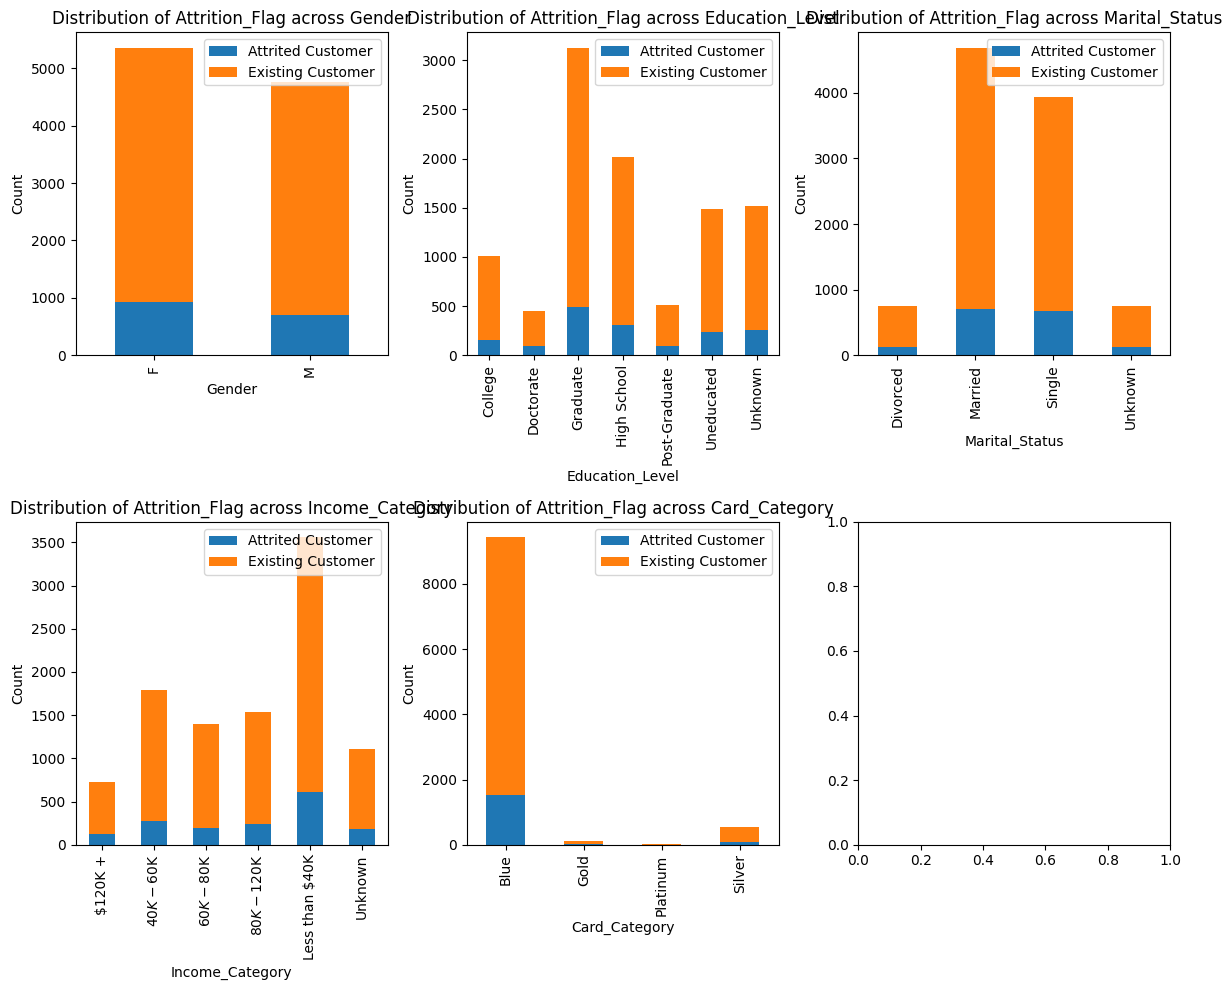

In [14]:
# Stacked bar plots of Attrition_Flag across different categories
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

categories = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    counts = df.groupby([category, 'Attrition_Flag']).size().unstack()
    counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Attrition_Flag across {category}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('attrition_categories_stacked_bar.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()



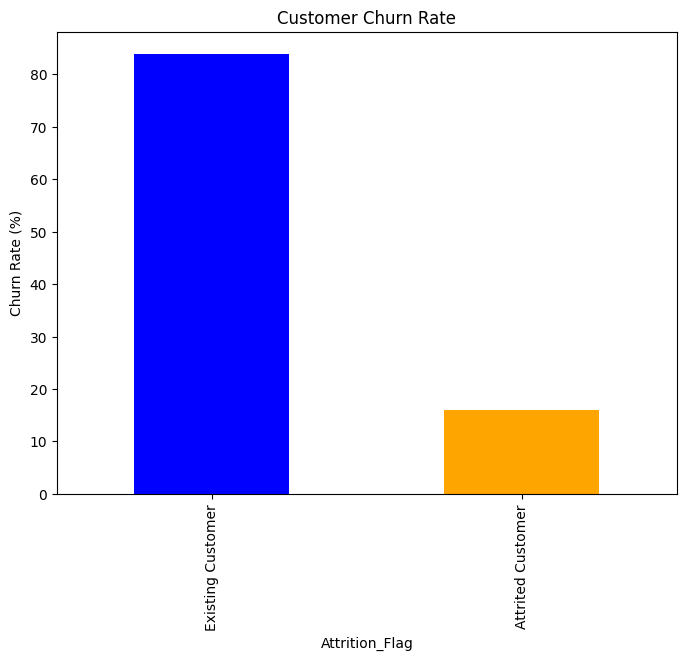

In [15]:
# Customer churn rate
churn_rate = df['Attrition_Flag'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
churn_rate.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Attrition_Flag')
plt.ylabel('Churn Rate (%)')
plt.title('Customer Churn Rate')
plt.savefig('churn_rate_bar.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()

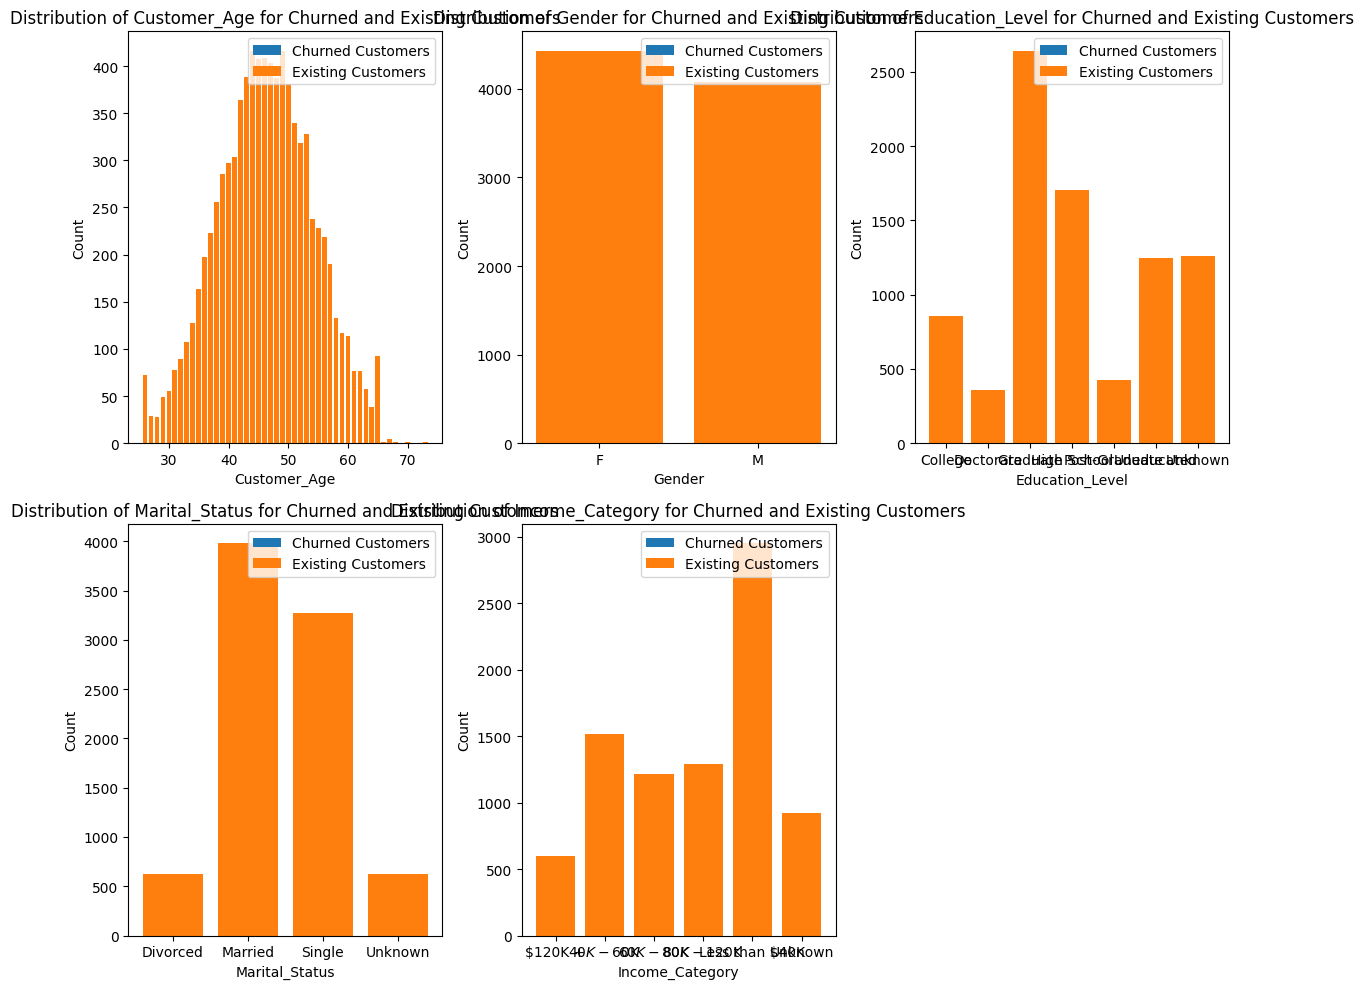

In [16]:
import matplotlib.pyplot as plt
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']

# Demographic Analysis
demographic_vars = ['Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category']

plt.figure(figsize=(12, 10))

# Iterate over demographic variables
for i, var in enumerate(demographic_vars):
    plt.subplot(2, 3, i+1)
    churned_counts = churned_customers[var].value_counts().sort_index()
    existing_counts = existing_customers[var].value_counts().sort_index()
    
    # Plotting bar charts
    plt.bar(churned_counts.index, churned_counts.values, label='Churned Customers')
    plt.bar(existing_counts.index, existing_counts.values, label='Existing Customers')
    
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Distribution of {var} for Churned and Existing Customers')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('demographic_analysis.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


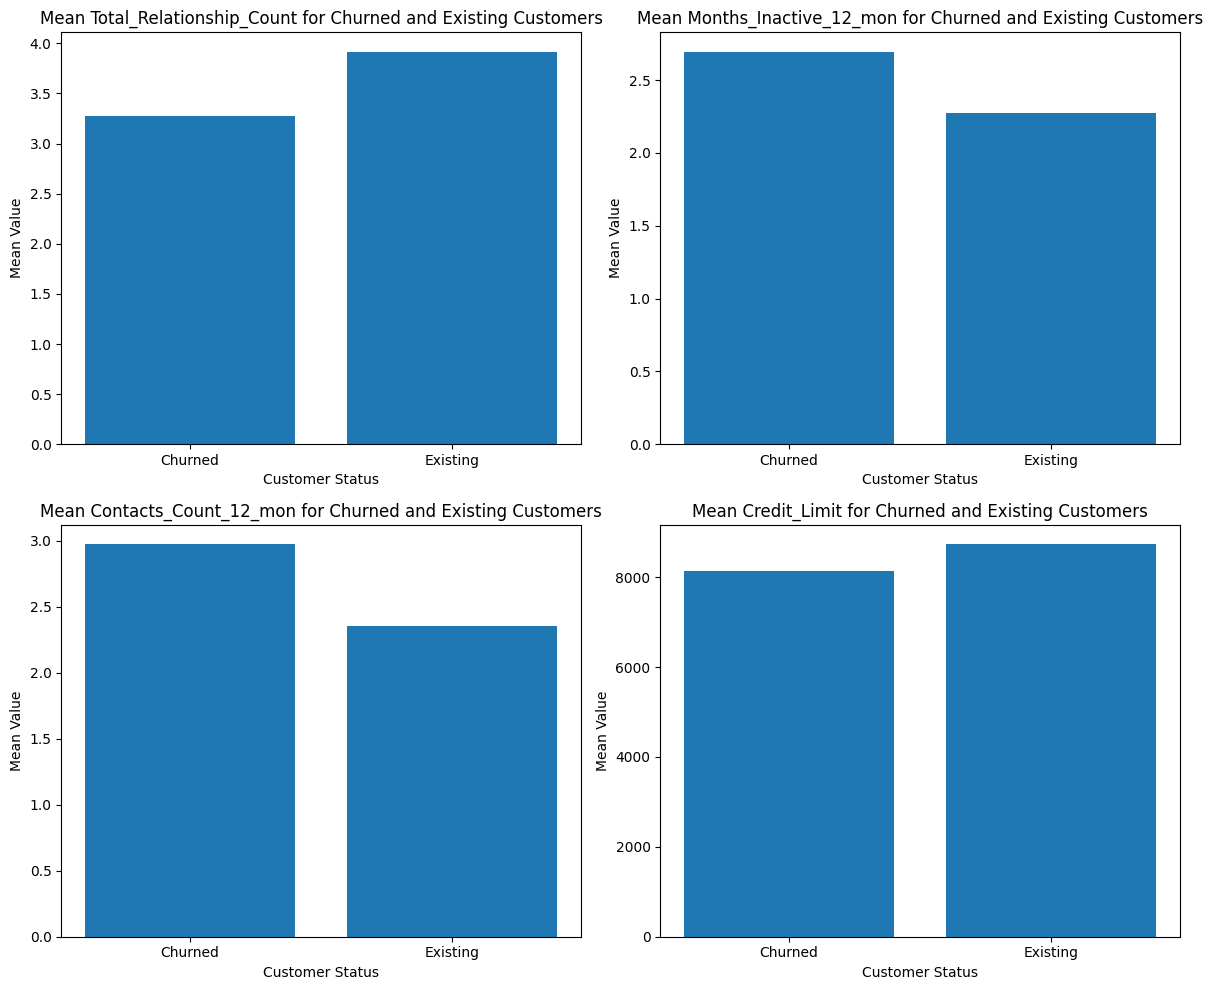

In [17]:
#B.I analysis to know arious factors that may contribute to customer churn
import matplotlib.pyplot as plt

# Business Intelligence Analysis
bi_vars = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit']

plt.figure(figsize=(12, 10))

# Iterate over business intelligence variables
for i, var in enumerate(bi_vars):
    plt.subplot(2, 2, i+1)
    churned_mean = df[df['Attrition_Flag'] == 'Attrited Customer'][var].mean()
    existing_mean = df[df['Attrition_Flag'] == 'Existing Customer'][var].mean()
    
    # Plotting bar charts
    plt.bar(['Churned', 'Existing'], [churned_mean, existing_mean])
    
    plt.xlabel('Customer Status')
    plt.ylabel('Mean Value')
    plt.title(f'Mean {var} for Churned and Existing Customers')

plt.tight_layout()
plt.savefig('business_intelligence_analysis.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


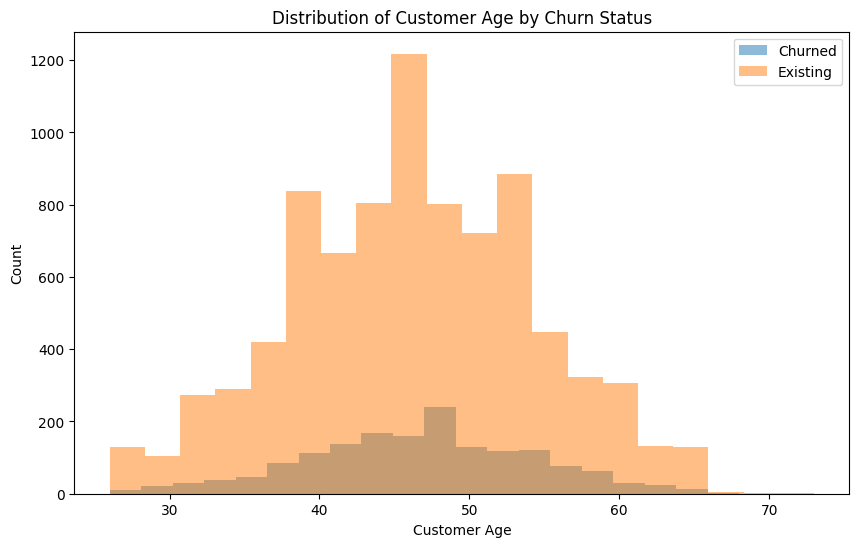

In [18]:
#distribution of customer ages and their churn status:
import matplotlib.pyplot as plt

# Visualization - Customer Age and Churn
plt.figure(figsize=(10, 6))
plt.hist(df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'], bins=20, alpha=0.5, label='Churned')
plt.hist(df[df['Attrition_Flag'] == 'Existing Customer']['Customer_Age'], bins=20, alpha=0.5, label='Existing')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age by Churn Status')
plt.legend()
plt.savefig('customer_age_churn_distribution.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


Churn Rate: 0.1606596227905599

Churn by Customer_Age
Customer_Age
48    85
43    85
44    84
46    82
45    79
49    79
41    76
47    76
50    71
54    69
40    64
42    62
53    59
51    58
52    58
55    51
39    48
38    47
56    43
59    40
37    37
57    33
58    24
36    24
35    21
33    20
34    19
32    17
62    17
61    17
30    15
31    13
60    13
65     9
63     8
29     7
26     6
64     5
27     3
66     1
28     1
68     1
Name: count, dtype: int64


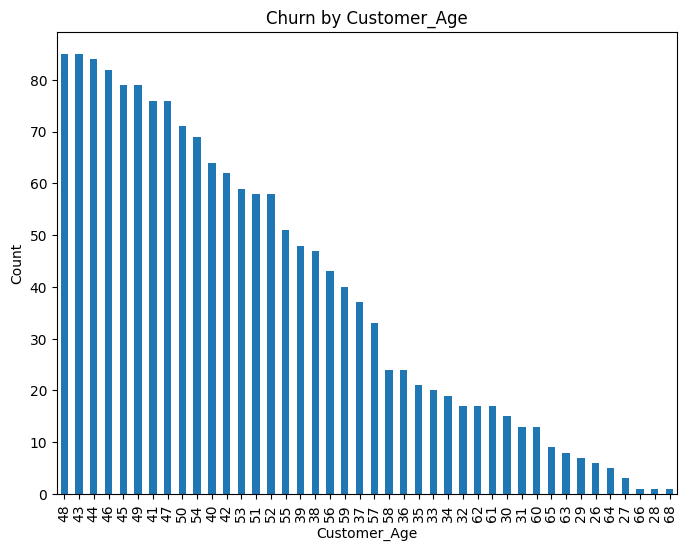


Churn by Gender
Gender
F    930
M    697
Name: count, dtype: int64


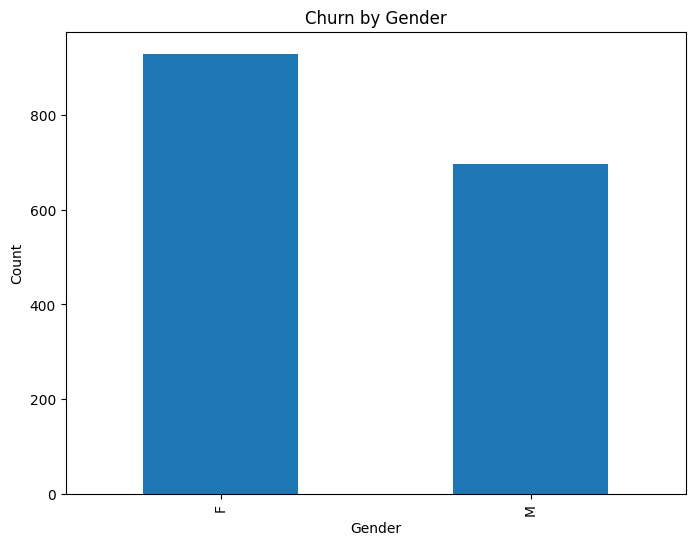


Churn by Education_Level
Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: count, dtype: int64


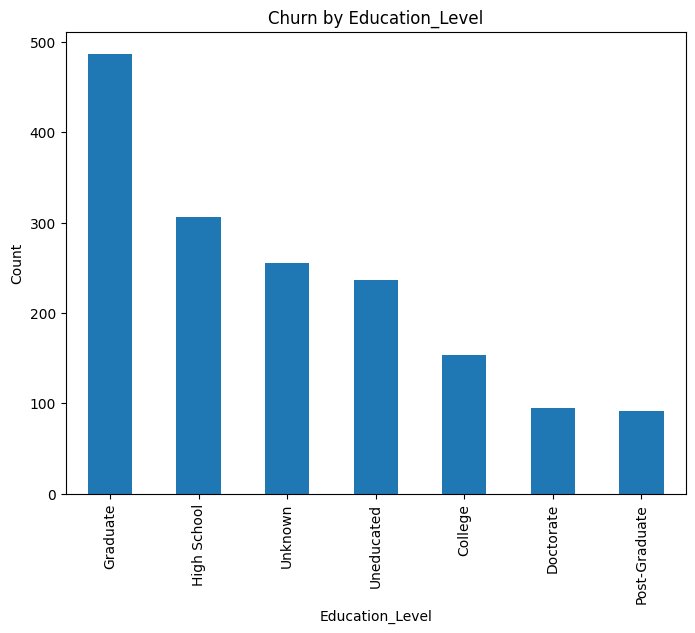


Churn by Marital_Status
Marital_Status
Married     709
Single      668
Unknown     129
Divorced    121
Name: count, dtype: int64


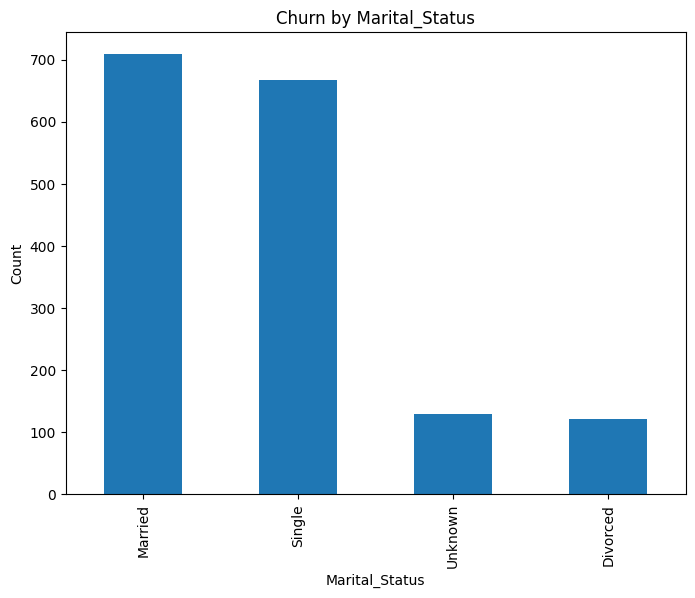


Churn by Income_Category
Income_Category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: count, dtype: int64


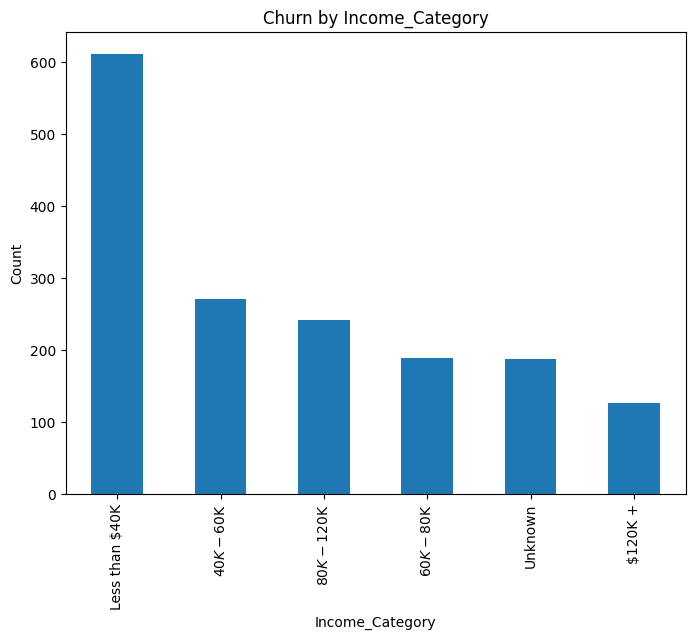


Churn by Card_Category
Card_Category
Blue        1519
Silver        82
Gold          21
Platinum       5
Name: count, dtype: int64


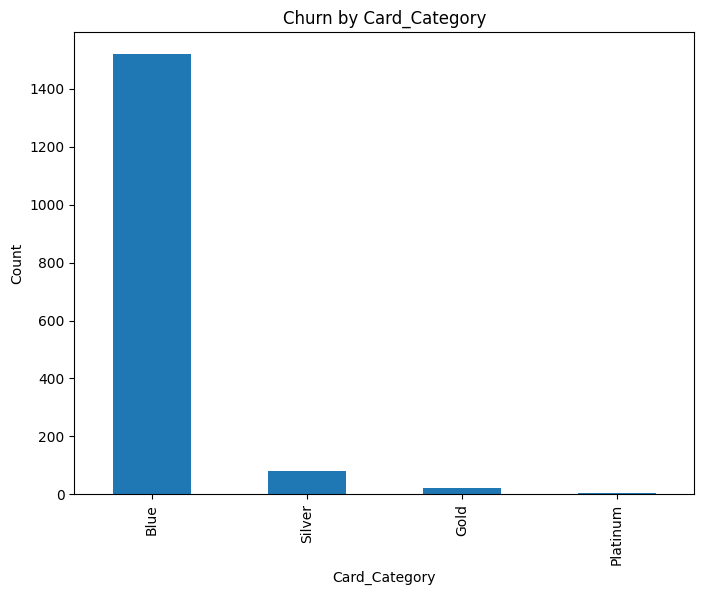

In [19]:
import matplotlib.pyplot as plt

# Calculate churn rate
total_customers = len(df)
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']
churn_rate = len(churned_customers) / total_customers

# Print churn rate
print("Churn Rate:", churn_rate)

# Identify factors influencing churn
factors = ['Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for factor in factors:
    churn_by_factor = churned_customers[factor].value_counts()
    print("\nChurn by", factor)
    print(churn_by_factor)

    # Plotting churn by factor
    plt.figure(figsize=(8, 6))
    churn_by_factor.plot(kind='bar')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.title(f'Churn by {factor}')
    plt.savefig(f'churn_by_{factor}.jpg', format='jpg')  # Save the plot as a JPG file
    plt.show()


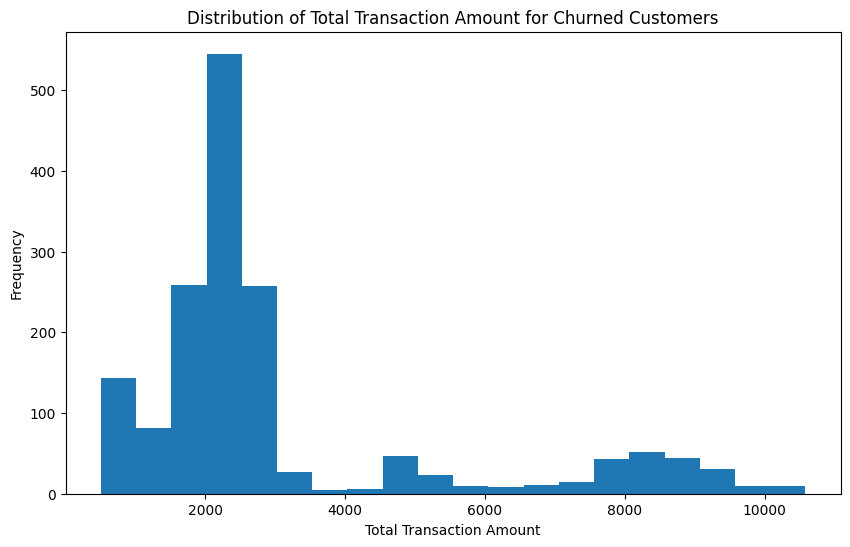

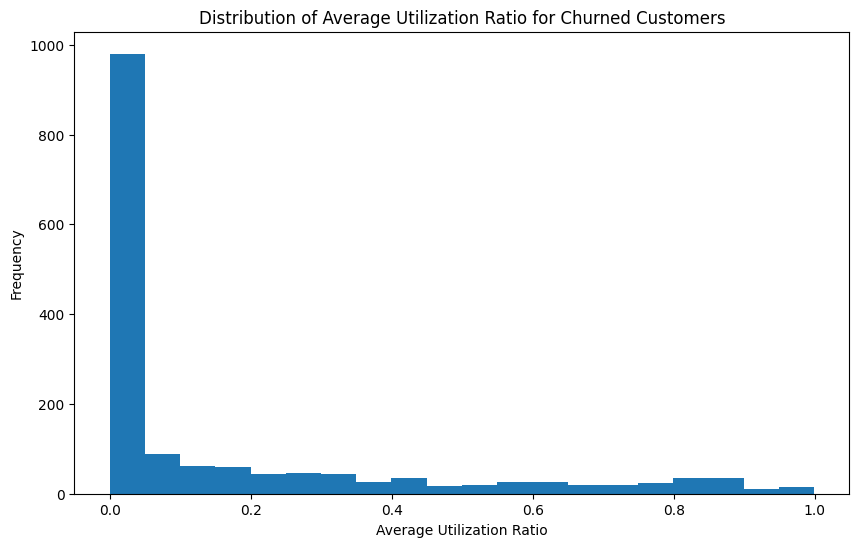

In [20]:
# Filter churned customers
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# Analyze transaction history
churned_customers['Total_Trans_Amt'].describe()  # Example: Descriptive statistics for total transaction amount
churned_customers['Avg_Utilization_Ratio'].describe()  # Example: Descriptive statistics for average utilization ratio

# Create visualizations
plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Total_Trans_Amt'], bins=20)
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Transaction Amount for Churned Customers')
plt.savefig('churned_transaction_amount.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(churned_customers['Avg_Utilization_Ratio'], bins=20)
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Average Utilization Ratio for Churned Customers')
plt.savefig('churned_utilization_ratio.jpg', format='jpg')  # Save the plot as a JPG file
plt.show()


In [21]:
import pandas as pd
from sklearn.cluster import KMeans

# Step 1: Segment your customer base (Example using K-means clustering)
X = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

# Specify the number of desired clusters
num_clusters = 3

# Fit K-means clustering model to the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each customer
df['segment'] = kmeans.labels_

# Step 2: Calculate segment-specific metrics
segment_metrics = df.groupby('segment').agg({
    'Total_Trans_Amt': 'mean',
    'Credit_Limit': 'mean',
    'Attrition_Flag': lambda x: (x == 'Attrited Customer').mean() * 100,  # churn rate (%)
    # Add more metrics as needed
})

# Step 3: Compare segment characteristics (Print the metrics)
print(segment_metrics)

# Step 4: Tailor marketing strategies and retention efforts based on insights
# Use the segment metrics to customize your strategies, offers, and communications
# For example:
# - Target high-value segments with exclusive promotions or VIP treatment
# - Develop personalized retention campaigns for churn-prone segments
# - Adapt messaging and product offerings to align with segment preferences

# Note: Make sure to preprocess the data, handle missing values, and evaluate the quality of the clusters before performing the analysis.


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Total_Trans_Amt  Credit_Limit  Attrition_Flag
segment                                               
0             4940.73584  13967.443848       14.501953
1             4056.74415   3674.761002       16.523973
2             5650.69281  30866.241830       16.059757


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Select relevant features for clustering
features = ['Customer_Age', 'Income_Category', 'Total_Trans_Amt', 'Total_Revolving_Bal']

# Encode categorical feature
encoder = LabelEncoder()
df['Income_Category'] = encoder.fit_transform(df['Income_Category'])

# Perform feature scaling if required

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(df[features])


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
import pandas as pd

# Assuming you have a DataFrame named df with your actual data

# Convert 'Attrition_Flag' column to numerical representation
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

# Select relevant numerical columns for calculations
numeric_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Perform calculations on numerical columns
avg_transaction_amount = df['Total_Trans_Amt'].mean()
avg_credit_limit = df['Credit_Limit'].mean()
churn_rate = 1 - df['Attrition_Flag'].mean()

print("Average Transaction Amount:", avg_transaction_amount)
print("Average Credit Limit:", avg_credit_limit)
print("Churn Rate:", churn_rate)


Average Transaction Amount: 4404.086303939963
Average Credit Limit: 8631.953698034955
Churn Rate: 0.1606596227905599


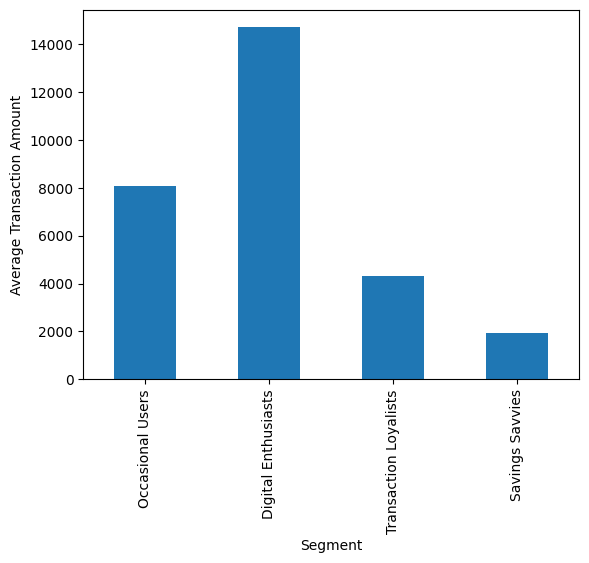

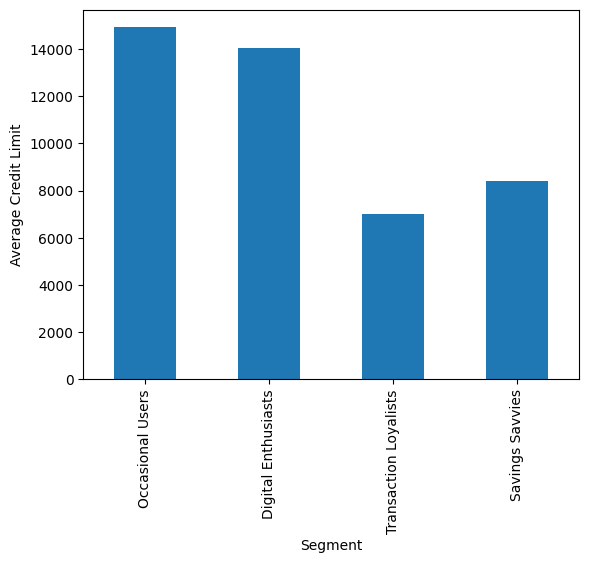

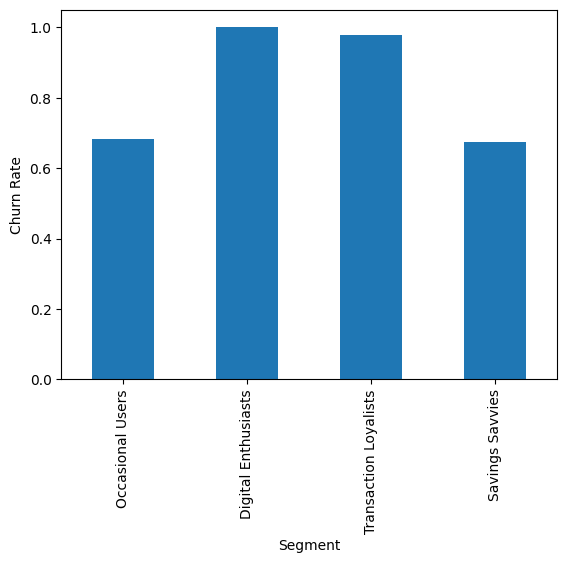

In [24]:
import matplotlib.pyplot as plt

# Calculate segment-specific metrics
avg_transaction_amount = df.groupby('Segment')['Total_Trans_Amt'].mean()
avg_credit_limit = df.groupby('Segment')['Credit_Limit'].mean()
churn_rate = df.groupby('Segment')['Attrition_Flag'].mean()

segment_names = ["Occasional Users", "Digital Enthusiasts", "Transaction Loyalists", "Savings Savvies"]

# Compare average transaction amount across segments
avg_transaction_amount.plot(kind='bar', xlabel='Segment', ylabel='Average Transaction Amount')
plt.xticks(range(len(segment_names)), segment_names)
plt.savefig('average_transaction_amount.jpg')
plt.show()

# Compare average credit limit across segments
avg_credit_limit.plot(kind='bar', xlabel='Segment', ylabel='Average Credit Limit')
plt.xticks(range(len(segment_names)), segment_names)
plt.savefig('average_credit_limit.jpg')
plt.show()

# Compare churn rate across segments
churn_rate.plot(kind='bar', xlabel='Segment', ylabel='Churn Rate')
plt.xticks(range(len(segment_names)), segment_names)
plt.savefig('churn_rate.jpg')
plt.show()

